In [4]:
import pandas as pd
import plotly.express as px

In [5]:
data = pd.read_csv("C:/Users/khush/Downloads/AB_NYC_2019.csv")

In [6]:
data.head()


id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

In [7]:
#finding missing values
miss_values = data.isnull().sum()
print("missing values in each column")
print(miss_values)

missing values in each column
id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64


In [20]:
cleaned_value = data.dropna(subset=['name', 'host_name', 'last_review','reviews_per_month'])
cleaned_value
                                    

id                                              name    host_id  \
0          2539                Clean & quiet apt home by the park       2787   
1          2595                             Skylit Midtown Castle       2845   
3          3831                   Cozy Entire Floor of Brownstone       4869   
4          5022  Entire Apt: Spacious Studio/Loft by central park       7192   
5          5099         Large Cozy 1 BR Apartment In Midtown East       7322   
...         ...                                               ...        ...   
48782  36425863        Lovely Privet Bedroom with Privet Restroom   83554966   
48790  36427429                          No.2 with queen size bed  257683179   
48799  36438336                                   Seas The Moment  211644523   
48805  36442252                     1B-1B apartment near by Metro  273841667   
48852  36455809           Cozy Private Room in Bushwick, Brooklyn   74162901   

         host_name neighbourhood_group    neighbourhood  latitude  longitude  \
0             John            Brooklyn       Kensington  40.64749  -73.97237   
1         Jennifer           Manhattan          Midtown  40.75362  -73.98377   
3      LisaRoxanne            Brooklyn     Clinton Hill  40.68514  -73.95976   
4            Laura           Manhattan      East Harlem  40.79851  -73.94399   
5            Chris           Manhattan      Murray Hill  40.74767  -73.97500   
...            ...                 ...              ...       ...        ...   
48782        Rusaa           Manhattan  Upper East Side  40.78099  -73.95366   
48790         H Ai              Queens         Flushing  40.75104  -73.81459   
48799          Ben       Staten Island      Great Kills  40.54179  -74.14275   
48805       Blaine               Bronx       Mott Haven  40.80787  -73.92400   
48852    Christine            Brooklyn         Bushwick  40.69805  -73.92801   

             room_type  price  minimum_nights  number_of_reviews last_review  \
0         Private room    149               1                  9  2018-10-19   
1      Entire home/apt    225               1                 45  2019-05-21   
3      Entire home/apt     89               1                270  2019-07-05   
4      Entire home/apt     80              10                  9  2018-11-19   
5      Entire home/apt    200               3                 74  2019-06-22   
...                ...    ...             ...                ...         ...   
48782     Private room    129               1                  1  2019-07-07   
48790     Private room     45               1                  1  2019-07-07   
48799     Private room    235               1                  1  2019-07-07   
48805  Entire home/apt    100               1                  2  2019-07-07   
48852     Private room     30               1                  1  2019-07-08   

       reviews_per_month  calculated_host_listings_count  availability_365  
0                   0.21                               6               365  
1                   0.38                               2               355  
3                   4.64                               1               194  
4                   0.10                               1                 0  
5                   0.59                               1               129  
...                  ...                             ...               ...  
48782               1.00                               1               147  
48790               1.00                               6               339  
48799               1.00                               1                87  
48805               2.00                               1                40  
48852               1.00                               1                 1  

[38821 rows x 16 columns]

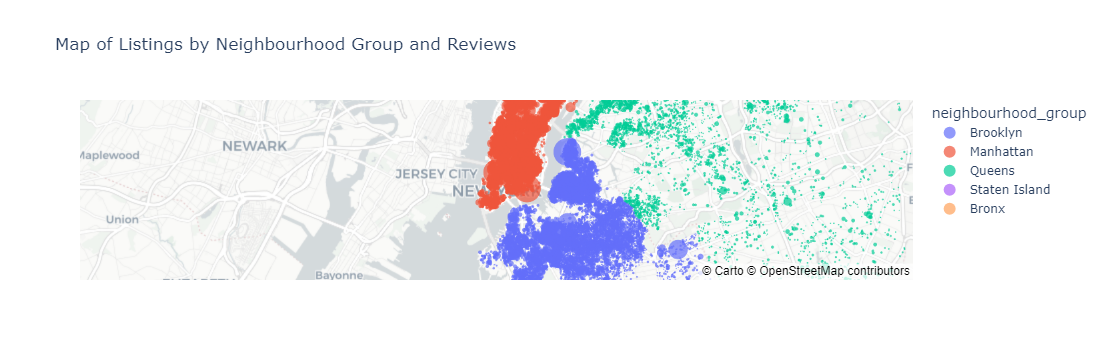

In [39]:
fig = px.scatter_mapbox(cleaned_value,lat='latitude', lon='longitude', color='neighbourhood_group', size='price',
                        title='Map of Listings by Neighbourhood Group and Reviews',
                        mapbox_style='carto-positron',
                        center={'lat':40.7128, 'lon':-74.0060},
                        zoom=10)
fig.show()

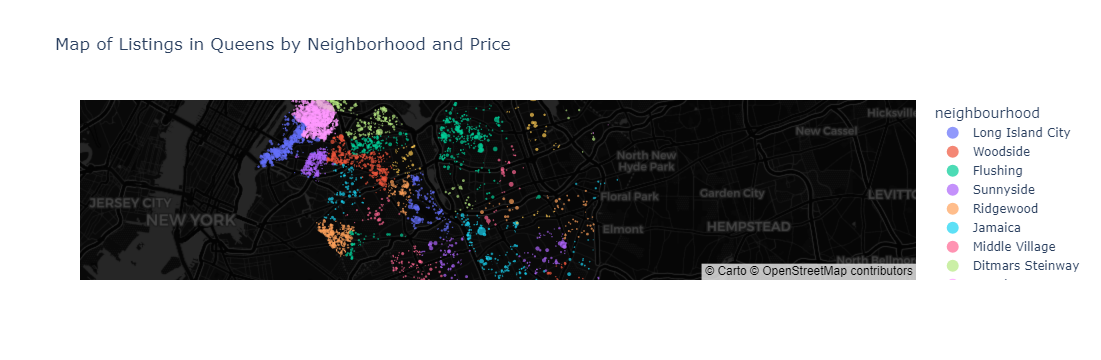

In [42]:
# Filter dataset for Queens
df_queens = cleaned_value[cleaned_value['neighbourhood_group'] == 'Queens']

# Create the mapbox plot
fig = px.scatter_mapbox(df_queens, lat='latitude', lon='longitude', color='neighbourhood', size='price', 
                        title='Map of Listings in Queens by Neighborhood and Price',
                        mapbox_style="carto-darkmatter",
                        center={'lat': 40.7282, 'lon': -73.7949},  # Centering on Queens
                        zoom=10)  # Adjust zoom level for Queens
fig.show()

C:\Users\khush\AppData\Local\Temp\ipykernel_16680\996104803.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\khush\anaconda3\Lib\site-packages\plotly\express\_core.py:1958: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



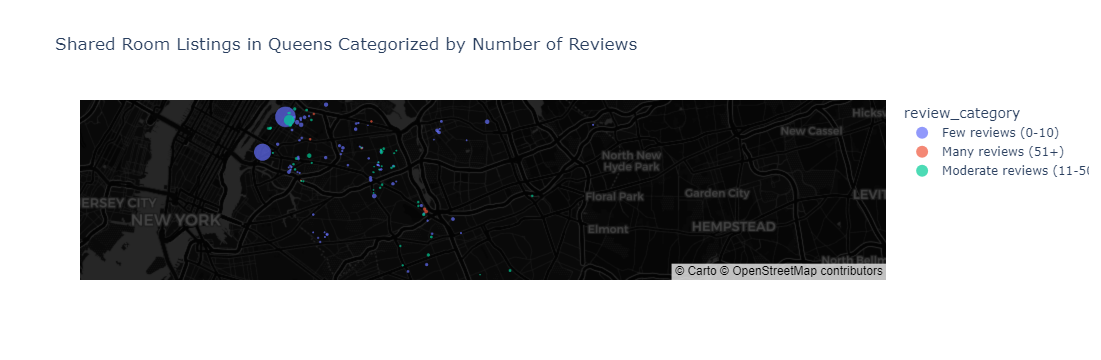

In [45]:
# Filter dataset for Queens and shared rooms
df_shared_rooms = cleaned_value[(cleaned_value['neighbourhood_group'] == 'Queens') & (cleaned_value['room_type'] == 'Shared room')]

# Create bins for the number of reviews
bins = [0, 10, 50, float('inf')]  # Define the bin ranges
labels = ['Few reviews (0-10)', 'Moderate reviews (11-50)', 'Many reviews (51+)']  # Define the labels for bins
df_shared_rooms['review_category'] = pd.cut(df_shared_rooms['number_of_reviews'], bins=bins, labels=labels, include_lowest=True)

# Create the scatter mapbox plot
fig = px.scatter_mapbox(
    df_shared_rooms, 
    lat='latitude', 
    lon='longitude', 
    color='review_category',  # Color based on the review category
    size='price',  # Size by price
    hover_name='name',
    hover_data={
        'price': True, 
        'number_of_reviews': True, 
        'availability_365': True
    },
    title='Shared Room Listings in Queens Categorized by Number of Reviews',
    mapbox_style="carto-darkmatter",  # Use dark map style
    center={'lat': 40.7282, 'lon': -73.7949},  # Centering on Queens
    zoom=10,
    size_max=15
)

fig.show()

In [50]:
SP = pd.read_csv("C:/Users/khush/Downloads/S&P.csv", header=1)
SP.head()

Year  S&P 500  Dividends Dividend Yield T.Bond rate Return on bond  \
0  1927.0    17.66       0.62          3.50%       3.17%            NaN   
1  1928.0    24.35       1.05          4.30%       3.45%          0.84%   
2  1929.0    21.45       0.88          4.10%       3.36%          4.20%   
3  1930.0    15.34       0.72          4.70%       3.22%          4.54%   
4  1931.0     8.12       0.50          6.10%       3.93%         -2.56%   

  Aaa Bond Rate Return on Aaa  Baa Bond Rate Return on Baa   \
0         4.46%            NaN         5.32%            NaN   
1         4.61%          3.28%         5.60%          3.22%   
2         4.67%          4.14%         5.95%          3.02%   
3         4.52%          5.86%         6.71%          0.54%   
4         5.32%         -1.56%        10.42%        -15.68%   

  Returns on Real Estate  Unnamed: 11  
0                    NaN          NaN  
1                  1.49%          NaN  
2                 -2.06%          NaN  
3                 -4.30%          NaN  
4                 -8.15%          NaN

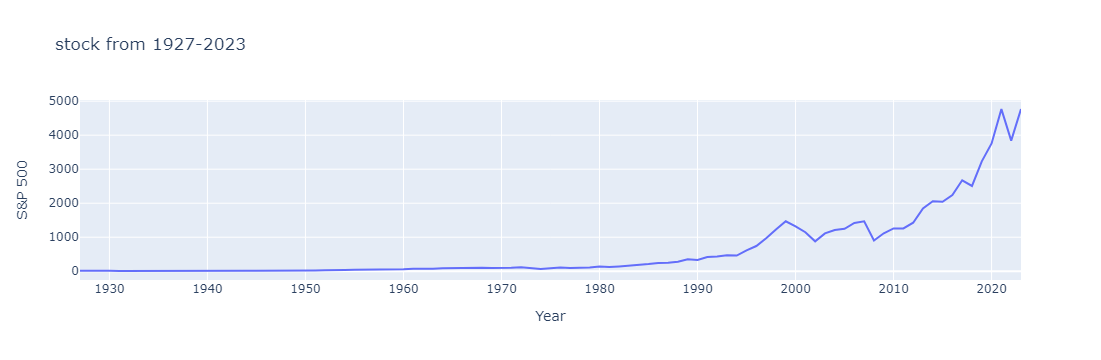

In [51]:
fig = px.line(SP, x ="Year", y="S&P 500", title= " stock from 1927-2023")
fig.show()

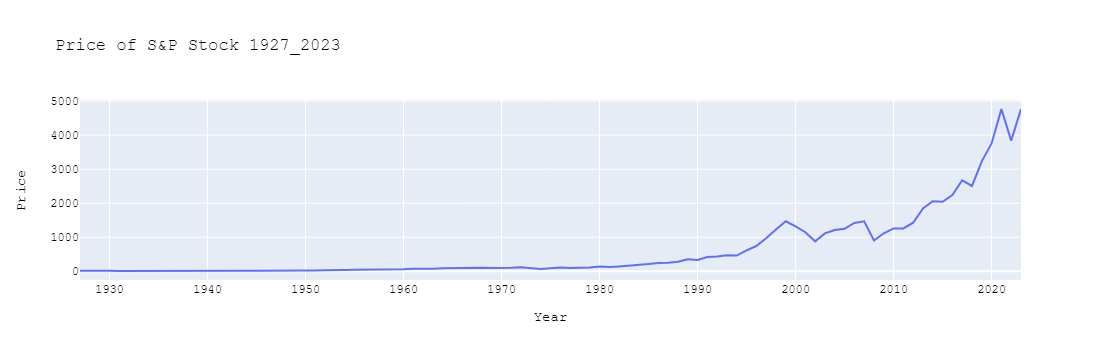

In [52]:
fig.update_layout(
    title ="Price of S&P Stock 1927_2023",
    xaxis_title = "Year",
    yaxis_title="Price",
    font=dict(
        family="Courier New",
        size = 12,
        color="black"
    )
)

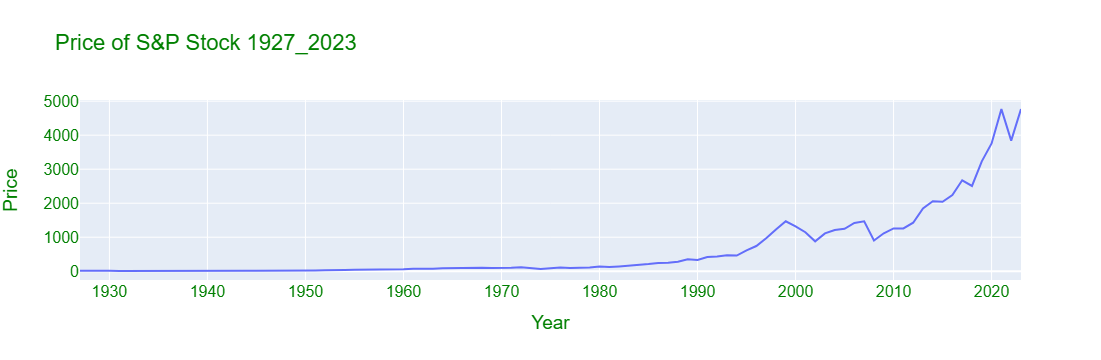

In [54]:
fig.update_layout(
    font=dict(
        family="Arial",
        size = 16,
        color ="Green"
    )
)

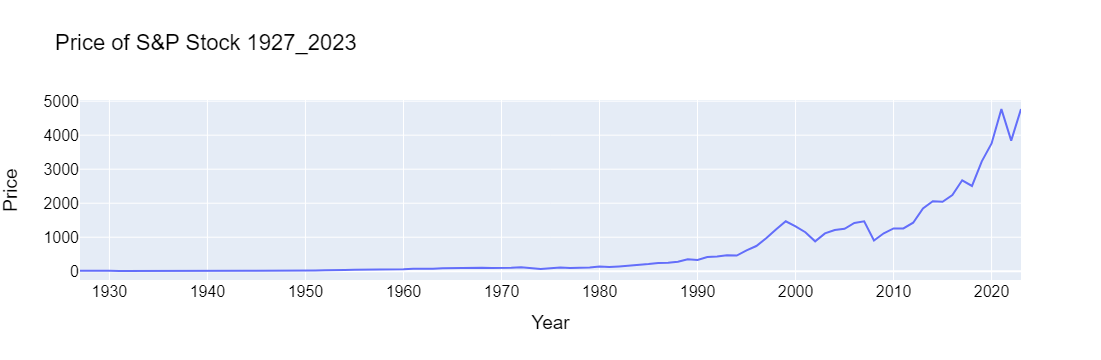

In [55]:
fig.update_layout(
    font=dict(
        family="Arial",
        size = 16,
        color ="Black"
    )
)

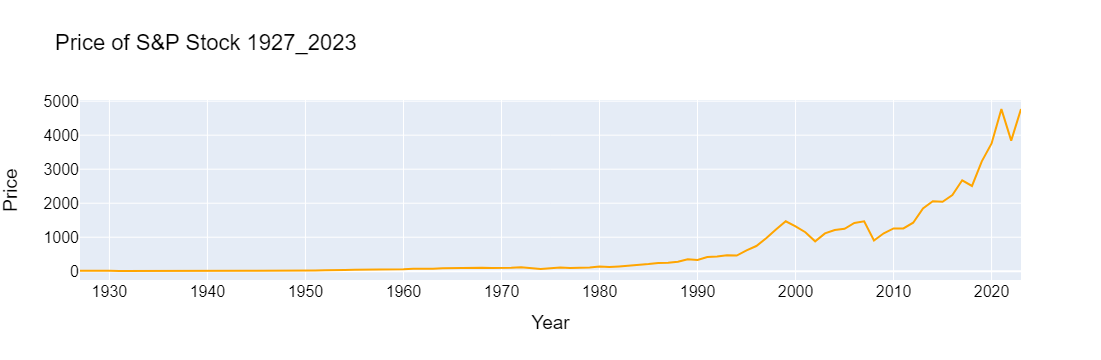

In [56]:
fig.update_traces(line_color = "orange", selector=dict(type='scatter'))

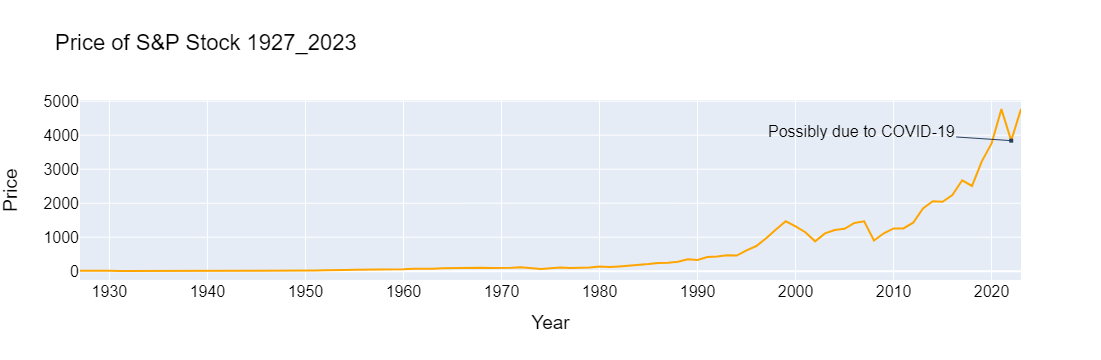

In [58]:
fig.add_annotation(
    x="2022",
    y = 3839.5,
    text ="Possibly due to COVID-19",
    showarrow= True,
    arrowhead =7,
    ax=-150,
    ay = -10,
    hovertext = "COVID-19 was a pandemic lasting from 2023 <br> tis is me creating a third line",
    hoverlabel = dict(
        bgcolor="white",
        bordercolor = "black",
        font=dict(
            color="black"
        )
    )
)

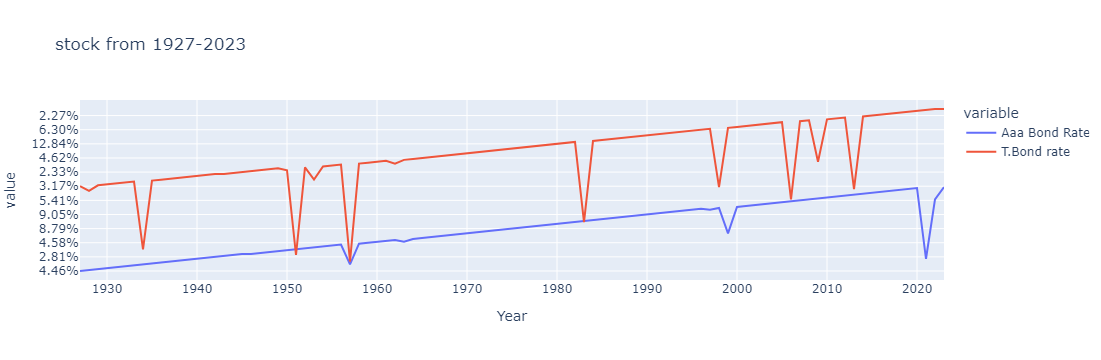

In [60]:
fig = px.line(SP, x ="Year", y=["Aaa Bond Rate", "T.Bond rate"], title= " stock from 1927-2023")
fig.show()


In [61]:
country = pd.read_csv("C:/Users/khush/Downloads/country_wise_latest.csv")
country.head()

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  New deaths  \
0    Afghanistan      36263    1269      25198    9796        106          10   
1        Albania       4880     144       2745    1991        117           6   
2        Algeria      27973    1163      18837    7973        616           8   
3        Andorra        907      52        803      52         10           0   
4         Angola        950      41        242     667         18           1   

   New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0             18                3.50                  69.49   
1             63                2.95                  56.25   
2            749                4.16                  67.34   
3              0                5.73                  88.53   
4              0                4.32                  25.47   

   Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                    5.04                35526            737   
1                    5.25                 4171            709   
2                    6.17                23691           4282   
3                    6.48                  884             23   
4                   16.94                  749            201   

   1 week % increase             WHO Region  
0               2.07  Eastern Mediterranean  
1              17.00                 Europe  
2              18.07                 Africa  
3               2.60                 Europe  
4              26.84                 Africa

In [62]:
data.describe()

id       host_id      latitude     longitude         price  \
count  4.889500e+04  4.889500e+04  48895.000000  48895.000000  48895.000000   
mean   1.901714e+07  6.762001e+07     40.728949    -73.952170    152.720687   
std    1.098311e+07  7.861097e+07      0.054530      0.046157    240.154170   
min    2.539000e+03  2.438000e+03     40.499790    -74.244420      0.000000   
25%    9.471945e+06  7.822033e+06     40.690100    -73.983070     69.000000   
50%    1.967728e+07  3.079382e+07     40.723070    -73.955680    106.000000   
75%    2.915218e+07  1.074344e+08     40.763115    -73.936275    175.000000   
max    3.648724e+07  2.743213e+08     40.913060    -73.712990  10000.000000   

       minimum_nights  number_of_reviews  reviews_per_month  \
count    48895.000000       48895.000000       38843.000000   
mean         7.029962          23.274466           1.373221   
std         20.510550          44.550582           1.680442   
min          1.000000           0.000000           0.010000   
25%          1.000000           1.000000           0.190000   
50%          3.000000           5.000000           0.720000   
75%          5.000000          24.000000           2.020000   
max       1250.000000         629.000000          58.500000   

       calculated_host_listings_count  availability_365  
count                    48895.000000      48895.000000  
mean                         7.143982        112.781327  
std                         32.952519        131.622289  
min                          1.000000          0.000000  
25%                          1.000000          0.000000  
50%                          1.000000         45.000000  
75%                          2.000000        227.000000  
max                        327.000000        365.000000

In [63]:
data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [65]:
country.drop_duplicates()

Country/Region  Confirmed  Deaths  Recovered  Active  New cases  \
0           Afghanistan      36263    1269      25198    9796        106   
1               Albania       4880     144       2745    1991        117   
2               Algeria      27973    1163      18837    7973        616   
3               Andorra        907      52        803      52         10   
4                Angola        950      41        242     667         18   
..                  ...        ...     ...        ...     ...        ...   
182  West Bank and Gaza      10621      78       3752    6791        152   
183      Western Sahara         10       1          8       1          0   
184               Yemen       1691     483        833     375         10   
185              Zambia       4552     140       2815    1597         71   
186            Zimbabwe       2704      36        542    2126        192   

     New deaths  New recovered  Deaths / 100 Cases  Recovered / 100 Cases  \
0            10             18                3.50                  69.49   
1             6             63                2.95                  56.25   
2             8            749                4.16                  67.34   
3             0              0                5.73                  88.53   
4             1              0                4.32                  25.47   
..          ...            ...                 ...                    ...   
182           2              0                0.73                  35.33   
183           0              0               10.00                  80.00   
184           4             36               28.56                  49.26   
185           1            465                3.08                  61.84   
186           2             24                1.33                  20.04   

     Deaths / 100 Recovered  Confirmed last week  1 week change  \
0                      5.04                35526            737   
1                      5.25                 4171            709   
2                      6.17                23691           4282   
3                      6.48                  884             23   
4                     16.94                  749            201   
..                      ...                  ...            ...   
182                    2.08                 8916           1705   
183                   12.50                   10              0   
184                   57.98                 1619             72   
185                    4.97                 3326           1226   
186                    6.64                 1713            991   

     1 week % increase             WHO Region  
0                 2.07  Eastern Mediterranean  
1                17.00                 Europe  
2                18.07                 Africa  
3                 2.60                 Europe  
4                26.84                 Africa  
..                 ...                    ...  
182              19.12  Eastern Mediterranean  
183               0.00                 Africa  
184               4.45  Eastern Mediterranean  
185              36.86                 Africa  
186              57.85                 Africa  

[187 rows x 15 columns]

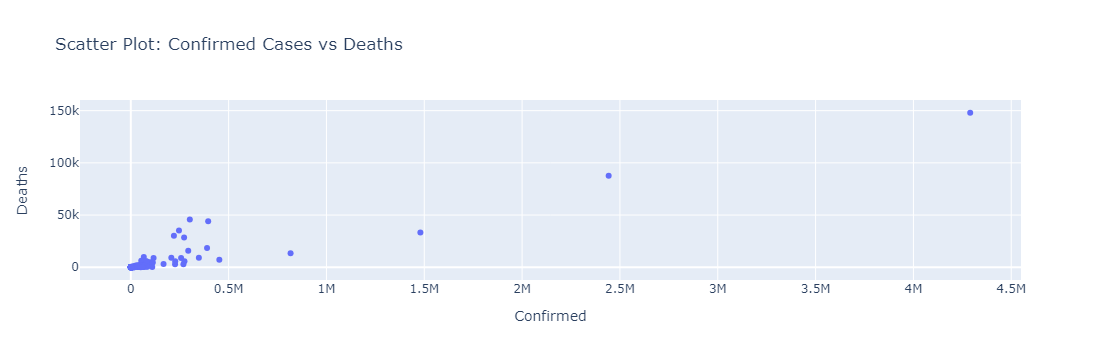

In [67]:
fig = px.scatter(country, x='Confirmed', y='Deaths',title='Scatter Plot: Confirmed Cases vs Deaths')
fig.show()

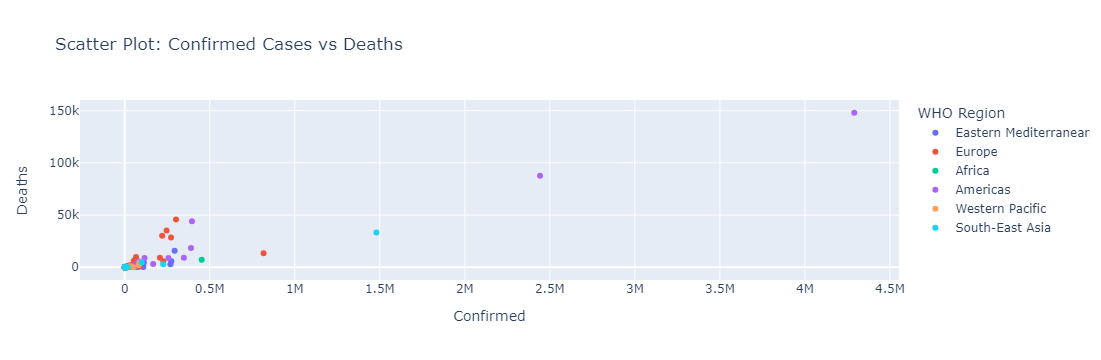

In [69]:
fig = px.scatter(country, x='Confirmed', y='Deaths',color ='WHO Region',title='Scatter Plot: Confirmed Cases vs Deaths')
fig.show()

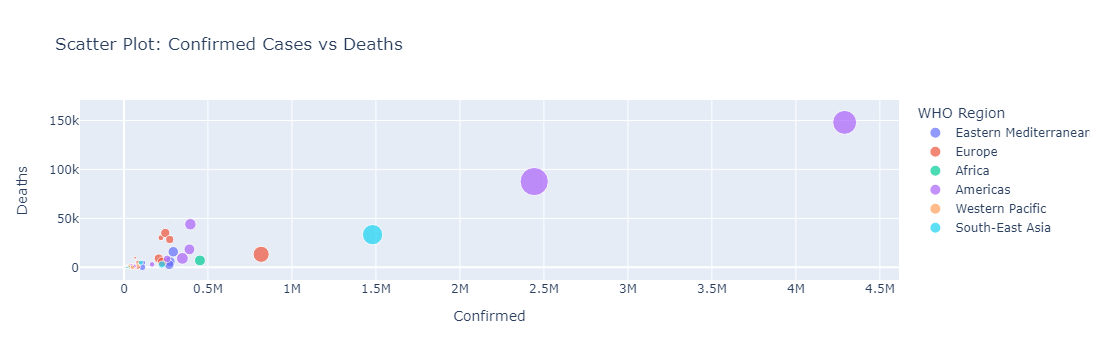

In [70]:
fig = px.scatter(country, x='Confirmed', y='Deaths',color ='WHO Region', size ='Recovered',title='Scatter Plot: Confirmed Cases vs Deaths')
fig.show()

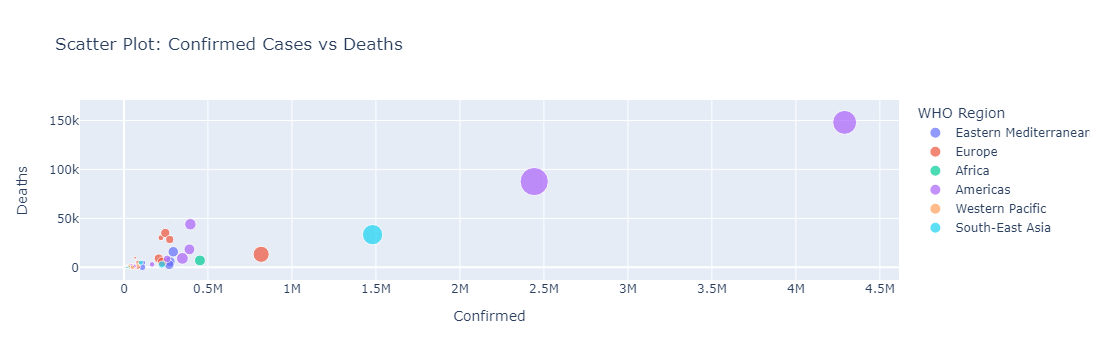

In [71]:
fig = px.scatter(country, x='Confirmed', y='Deaths',color ='WHO Region', size ='Recovered', hover_data=['Country/Region','Active','New cases'],title='Scatter Plot: Confirmed Cases vs Deaths')
fig.show()

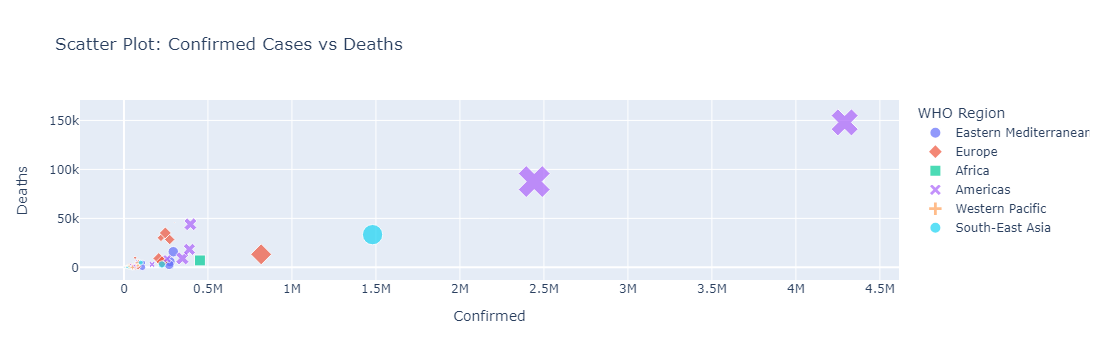

In [72]:
fig = px.scatter(country, x='Confirmed', y='Deaths',color ='WHO Region', size ='Recovered', hover_data=['Country/Region','Active','New cases',],title='Scatter Plot: Confirmed Cases vs Deaths', symbol='WHO Region')
fig.show()

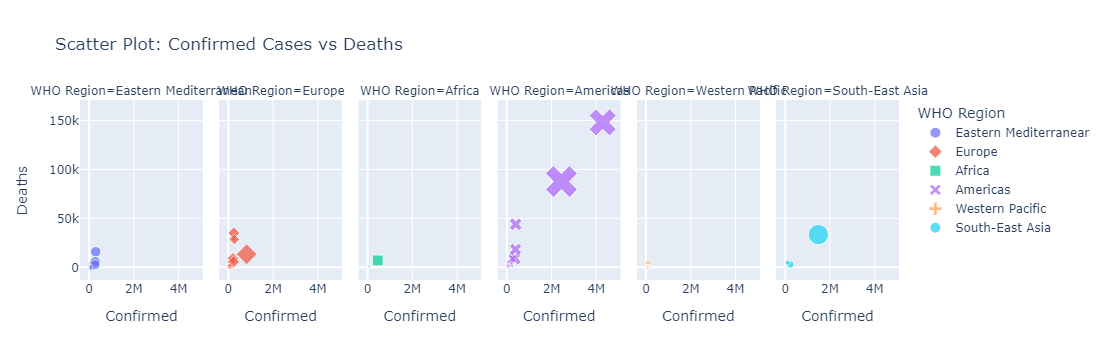

In [77]:
fig = px.scatter(country, x='Confirmed', y='Deaths',color ='WHO Region', size ='Recovered', hover_data=['Country/Region','Active','New cases'],title='Scatter Plot: Confirmed Cases vs Deaths', symbol='WHO Region', facet_col ='WHO Region')
fig.show()